# Sample DEMs at ATL06SR Point Locations

#### Steps:
* Sample various rasters at various resolutions (3m, 20m, 100m) at each ATL06SR point: snow-off DTM and slope maps

In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio as rio
import pickle
import pyproj

# Import file containing sampling function written by Friedrich Knuth
import core

In [3]:
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', None)

# Load SlideRule

In [5]:
#atl06sr_gdf = pickle.load(open('../../data/atl06/methow_all_sr-atl06-10172022_processed.pkl', 'rb'))
atl06sr_gdf = pickle.load(open('../../data/atl06/methow_all_sr-atl06-10172022_processed_bicubic.pkl', 'rb'))
outline_gdf = pickle.load(open('../../data/site_outlines/methow_outline_32610.pkl', 'rb'))

/var/folders/yr/1f67jccn6hl_lyxnqy7qjpq40000gp/T/ipykernel_4219/3116122126.py:2: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  atl06sr_gdf = pickle.load(open('../../data/atl06/methow_all_sr-atl06-10172022_processed_bicubic.pkl', 'rb'))
/var/folders/yr/1f67jccn6hl_lyxnqy7qjpq40000gp/T/ipykernel_4219/3116122126.py:3: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  outline_gdf = pickle.load(open('../../data/site_outlines/methow_outline_32610.pkl', 'rb'))


In [7]:
atl06sr_gdf.crs

<Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:7912", "EPSG:2927+5703", always_xy=True)



In [16]:
atl06sr_gdf_7912 = atl06sr_gdf.to_crs('epsg:7912')

In [17]:
atl06sr_gdf_7912[-2:-1]

,pflags,h_mean,dh_fit_dy,spot,w_surface_window_final,h_sigma,distance,segment_id,dh_fit_dx,rgt,cycle,delta_time,gt,n_fit_photons,rms_misfit,geometry,acqdate,doy,decyear,dowy,snow_presence,lidar_z,difference,lidar_z_20m,difference_20m,slope_3m,slope_20m,slope_100m,diff_plus,diff_plus_20m,zscore,n,diff_plus_lowslope,bicubic_lidar_z,sampling_dif,difference_bicubic,diff_plus_bicubic,median_slope20d
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-03-07 12:15:04.239183408,0,2234.139058,0.0,4,3.0,0.088278,5.398207e+06,269210,-0.05614,1149,14,1.318905e+08,40,13,0.298621,POINT (-120.52502 48.48523),2022-03-07,66,2022.179481,158,1,2232.775879,1.363179,2232.966797,1.172261,2.780463,6.154667,7.82458,1.802961,1.607732,1.574034,361,1.715725,2232.769989,0.00589,1.369069,1.805264,5.495207


In [22]:
atl06sr_gdf[-2:-1]

,pflags,h_mean,dh_fit_dy,spot,w_surface_window_final,h_sigma,distance,segment_id,dh_fit_dx,rgt,cycle,delta_time,gt,n_fit_photons,rms_misfit,geometry,acqdate,doy,decyear,dowy,snow_presence,lidar_z,difference,lidar_z_20m,difference_20m,slope_3m,slope_20m,slope_100m,diff_plus,diff_plus_20m,zscore,n,diff_plus_lowslope,bicubic_lidar_z,sampling_dif,difference_bicubic,diff_plus_bicubic,median_slope20d
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-03-07 12:15:04.239183408,0,2234.139058,0.0,4,3.0,0.088278,5.398207e+06,269210,-0.05614,1149,14,1.318905e+08,40,13,0.298621,POINT (682879.288 5373191.645),2022-03-07,66,2022.179481,158,1,2232.775879,1.363179,2232.966797,1.172261,2.780463,6.154667,7.82458,1.802961,1.607732,1.574034,361,1.715725,2232.769989,0.00589,1.369069,1.805264,5.495207


In [21]:
transformer.transform(-120.52502,48.48523,2234.139058)

(1634353.6087010317, 1149645.10053732, 2251.2873888505574)

In [23]:
2251.2873888505574 - 2234.139058

17.14833085055716

In [24]:
transformer.transform(-120.40000,48.60000,1400.00000)

(1664635.6584199672, 1191552.2990717422, 1417.5373677251116)

In [16]:
# Transform geopandas points via pyproj

transformer = pyproj.Transformer.from_crs("EPSG:7912", "EPSG:2927+5703", always_xy=True)

gf = gpd.GeoDataFrame(geometry=gpd.points_from_xy([-120.4, -120.52502], [48.6, 48.48523], [1400, 2234.139058]),
                  crs='EPSG:7912'
                 )

transformer.transform(gf.geometry.x.values, gf.geometry.y.values, gf.geometry.z.values)

(array([1664631.84089118, 1634349.77412143]),
 array([1191554.23227549, 1149647.00428579]),
 array([1417.53738899, 2251.28741008]))

In [19]:
gf_new = gf.to_crs("EPSG:2927+5703")
gf_new

,geometry
0,POINT Z (1664631.841 1191554.232 1417.537)
1,POINT Z (1634349.774 1149647.004 2251.287)


,geometry
0,POINT Z (1664631.841 1191554.232 1417.537)
1,POINT Z (1634349.774 1149647.004 2251.287)


In [11]:
dep_gdf = gpd.read_file('../../data/methow_test_3dep.geojson')

In [16]:
atl06sr_gdf.head(2)

,pflags,h_mean,dh_fit_dy,spot,w_surface_window_final,h_sigma,distance,segment_id,dh_fit_dx,rgt,cycle,delta_time,gt,n_fit_photons,rms_misfit,geometry,acqdate,doy,decyear,dowy,snow_presence
time,,,,,,,,,,,,,,,,,,,,,
2018-11-09 22:09:43.662511060,0,774.110259,0.0,5,9.386548,0.079705,5.382001e+06,268398,0.367318,646,1,2.703658e+07,20,41,0.506044,POINT (722265.057 5358346.501),2018-11-09,313,2018.857324,40,0
2018-11-09 22:09:43.789049908,0,919.941824,0.0,5,3.000000,0.050617,5.382903e+06,268443,0.028568,646,1,2.703658e+07,20,42,0.305572,POINT (722145.580 5359238.959),2018-11-09,313,2018.857324,40,0


# Difference with Reference DTM 

## Load Snow Off DTM & Slope DTMs
DTM was commissioned by WaDNR, flown in summer 2018  
Slope DTMs were produced via downscaling where necessary and then using gdaldem to output a slope file:  
"gdaldem slope $lidar_fn  $lidar_slope_fn -co COMPRESS=LZW -co TILED=YES -co BIGTIFF=IF_SAFER"  

Coarser DTMs were produced running gdaldem in the command line:  
"gdalwarp -tr 20 20 methow_basin_2018_dtm_combined_32610_1m.tif methow_basin_2018_dtm_combined_32610_20m.tif -co COMPRESS=LZW -co TILED=YES -co BIGTIFF=IF_SAFER"

In [12]:
lidar_fn = '../../data/lidar/methow/dtm/methow_basin_2018_dtm_combined_32610_1m.tif'
lidar20_fn = '../../data/lidar/methow/dtm/methow_basin_2018_dtm_combined_32610_20m.tif'

## Sample snow-off DEM  
1. Using the sample_raster function from David Shean. This uses nearest neighbor, which isn't the best interpolation method. The below function not only samples the DTM, but then computes the difference between the data using: **ICESat-2 - DTM**  
2. Using bicubic interopolation method written by Friedrich Knuth (UW) from https://github.com/uw-cryo/raster_sampling  
  
Then compare the two methods. Spoiler alert, bicubic is better and the IQR of the difference between the two has an IQR of about 0.36 m

In [13]:
lidar_snowoff_src = rio.open(lidar_fn)
lidar_snowoff20_src = rio.open(lidar20_fn)

In [60]:
# Get statistics about the highest and lowest elevation in the basin

#lidar_pre_arr = rxr.open_rasterio(lidar_fn)
#lidar_pre_arr = lidar_pre_arr > 0
#print(np.nanmin(lidar_pre_arr.values))
#print(np.nanmax(lidar_pre_arr.values))

### 1) Nearest Neighbor

In [22]:
# This function written by David Shean, UW
# This function uses nearest neighbor, which is not ideal

def sample_raster(df, src, diff_col=None):
    #df_proj = df.to_crs(src.crs)
    coord = [(pt.x, pt.y) for pt in df.to_crs(src.crs).geometry]
    s = np.fromiter(src.sample(coord), dtype=src.dtypes[0])
    #s[s == src.nodata] = np.nan
    sm = np.ma.masked_equal(s, src.nodata)
    sample_colname = os.path.splitext(os.path.split(src.name)[-1])[0]
    df[sample_colname] = sm
    if diff_col is not None:
        out_colname = '{} {} diff'.format(diff_col, sample_colname)
        df[out_colname] = df[diff_col] - df[sample_colname]
    else:
        out_colname = sample_colname
    return out_colname

In [23]:
# Sample snow-off lidar at native resolution

atl06sr_diff_col = sample_raster(atl06sr_gdf, lidar_snowoff_src, diff_col='h_mean')
atl06sr_diff_col

'h_mean methow_basin_2018_dtm_combined_32610_1m diff'

In [24]:
# Sample snow-off lidar at approximate resolution of ICESat-2 points

atl06sr_diff20_col = sample_raster(atl06sr_gdf, lidar_snowoff20_src, diff_col='h_mean')
atl06sr_diff20_col

'h_mean methow_basin_2018_dtm_combined_32610_20m diff'

In [63]:
atl06sr_gdf.head(2)

,pflags,h_mean,dh_fit_dy,spot,w_surface_window_final,h_sigma,distance,segment_id,dh_fit_dx,rgt,cycle,delta_time,gt,n_fit_photons,rms_misfit,geometry,acqdate,doy,decyear,dowy,snow_presence,methow_basin_2018_dtm_combined_32610_1m,h_mean methow_basin_2018_dtm_combined_32610_1m diff,methow_basin_2018_dtm_combined_32610_20m,h_mean methow_basin_2018_dtm_combined_32610_20m diff,methow_basin_2018_dtm_combined_32610_3m_slope,methow_basin_2018_dtm_combined_32610_20m_slope,methow_basin_2018_dtm_combined_32610_100m_slope
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-11-09 22:09:43.662511060,0,774.110259,0.0,5,9.386548,0.079705,5.382001e+06,268398,0.367318,646,1,2.703658e+07,20,41,0.506044,POINT (722265.057 5358346.501),2018-11-09,313,2018.857324,40,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-09 22:09:43.789049908,0,919.941824,0.0,5,3.000000,0.050617,5.382903e+06,268443,0.028568,646,1,2.703658e+07,20,42,0.305572,POINT (722145.580 5359238.959),2018-11-09,313,2018.857324,40,0,921.263184,-1.321359,924.401428,-4.459604,21.903059,11.596403,NaN


In [64]:
atl06sr_gdf = atl06sr_gdf.rename(columns={'methow_basin_2018_dtm_combined_32610_1m':'lidar_z',
                                          'methow_basin_2018_dtm_combined_32610_20m':'lidar_z_20m',
                                          'h_mean methow_basin_2018_dtm_combined_32610_20m diff':'difference_20m',
                                          'h_mean methow_basin_2018_dtm_combined_32610_1m diff':'difference', 
                                          'methow_basin_2018_dtm_combined_32610_3m_slope':'slope_3m',
                                          'methow_basin_2018_dtm_combined_32610_20m_slope':'slope_20m',
                                          'methow_basin_2018_dtm_combined_32610_100m_slope':'slope_100m'})
atl06sr_gdf.columns

Index(['pflags', 'h_mean', 'dh_fit_dy', 'spot', 'w_surface_window_final',
       'h_sigma', 'distance', 'segment_id', 'dh_fit_dx', 'rgt', 'cycle',
       'delta_time', 'gt', 'n_fit_photons', 'rms_misfit', 'geometry',
       'acqdate', 'doy', 'decyear', 'dowy', 'snow_presence', 'lidar_z',
       'difference', 'lidar_z_20m', 'difference_20m', 'slope_3m', 'slope_20m',
       'slope_100m'],
      dtype='object')

In [65]:
atl06sr_gdf.head(2)

,pflags,h_mean,dh_fit_dy,spot,w_surface_window_final,h_sigma,distance,segment_id,dh_fit_dx,rgt,cycle,delta_time,gt,n_fit_photons,rms_misfit,geometry,acqdate,doy,decyear,dowy,snow_presence,lidar_z,difference,lidar_z_20m,difference_20m,slope_3m,slope_20m,slope_100m
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-11-09 22:09:43.662511060,0,774.110259,0.0,5,9.386548,0.079705,5.382001e+06,268398,0.367318,646,1,2.703658e+07,20,41,0.506044,POINT (722265.057 5358346.501),2018-11-09,313,2018.857324,40,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-09 22:09:43.789049908,0,919.941824,0.0,5,3.000000,0.050617,5.382903e+06,268443,0.028568,646,1,2.703658e+07,20,42,0.305572,POINT (722145.580 5359238.959),2018-11-09,313,2018.857324,40,0,921.263184,-1.321359,924.401428,-4.459604,21.903059,11.596403,NaN


In [66]:
atl06sr_gdf['difference'].describe()

/Users/Hannah/opt/miniconda3/envs/analysis_2022/lib/python3.8/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count    146647.000000
mean         -0.517273
std           1.205088
min         -21.648634
25%          -1.019876
50%          -0.375062
75%           0.097123
max          15.269414
Name: difference, dtype: float64

In [67]:
atl06sr_gdf['difference_20m'].describe()

/Users/Hannah/opt/miniconda3/envs/analysis_2022/lib/python3.8/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count    146662.000000
mean         -0.545213
std           2.364963
min         -32.482130
25%          -1.626569
50%          -0.369045
75%           0.625908
max          26.855712
Name: difference_20m, dtype: float64

^ These differences include snow on data. They differ slightly depending on the resolution of the snow off lidar data

### 2) Bicubic Interpolation

In [5]:
CRS("EPSG:4326").to_3d()

<Geographic 3D CRS: EPSG:4979>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
CRS("EPSG:26910").to_3d()

<Projected CRS: PROJCRS["NAD83 / UTM zone 10N",BASEGEOGCRS["NAD83" ...>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- name: North America - between 126°W and 120°W - onshore and offshore. Canada - British Columbia; Northwest Territories; Yukon. United States (USA) - California; Oregon; Washington.
- bounds: (-126.0, 30.54, -119.99, 81.8)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
from pyproj import CRS, Transformer

transformer_3d = Transformer.from_crs(CRS("EPSG:4269").to_3d(), 
                                      CRS("EPSG:4326").to_3d(),
                                      always_xy=True,)




transformer_3d.transform(-121.7603, 46.8523, 1000.01)

# transformer = Transformer.from_crs("EPSG:4326", "EPSG:2056", always_xy=True)

# transformer.transform(8.37909, 47.01987, 1000)
# (2671499.8913080636, 1208075.1135782297, 1000.0)

# transformer_3d = Transformer.from_crs(

#     CRS("EPSG:4326").to_3d(),

#     CRS("EPSG:2056").to_3d(),

#     always_xy=True,
# )

# transformer_3d.transform(8.37909, 47.01987, 1000)

(-121.76029620273553, 46.8522969941696, 1000.01)

In [27]:
coord = [(pt.x, pt.y) for pt in atl06sr_gdf.to_crs(lidar_snowoff_src.crs).geometry]

## Compare the 3dep

In [15]:
coord = [(pt.x, pt.y) for pt in dep_gdf.to_crs(lidar_snowoff_src.crs).geometry]

bicubic_interp_3dep = core.interpolate(lidar_fn, coord, offset=3, kind='cubic')

In [16]:
dep_gdf['bicubic_lidar_z'] = bicubic_interp_3dep

In [60]:
dep_gdf['difference_bicubic'].describe()

count    338.000000
mean      -0.500028
std        2.569377
min      -21.067148
25%       -1.838787
50%       -0.393713
75%        0.640161
max       12.926314
Name: difference_bicubic, dtype: float64

In [61]:
dep_gdf['difference_3dep'].describe()

count    340.000000
mean      -0.479200
std        2.608950
min      -31.078445
25%       -1.705565
50%       -0.346021
75%        0.682472
max       10.062937
Name: difference_3dep, dtype: float64

In [35]:
dep_gdf['difference_bicubic'] = dep_gdf['h_mean'] - dep_gdf['bicubic_lidar_z']

In [40]:
dep_gdf = dep_gdf.assign(diff_plus_bicubic = dep_gdf['difference_bicubic'] - (-0.436195635256297))

In [41]:
dep_gdf['difference_3dep'] = dep_gdf['h_mean'] - dep_gdf['3dep']

In [67]:
dep_gdf['compare_3dep'] = dep_gdf['difference_bicubic'] - dep_gdf['difference_3dep']

In [68]:
dep_gdf['compare_3dep'].describe()

count    338.000000
mean      -0.025796
std        1.180365
min       -4.522874
25%       -0.558769
50%       -0.038093
75%        0.415120
max       10.011297
Name: compare_3dep, dtype: float64

In [28]:
dep_gdf['diff_plus_bicubic'].describe()

count     338.000000
mean     1619.681926
std       362.895766
min       918.643372
25%      1314.723985
50%      1663.623359
75%      1947.720467
max      2234.270775
Name: diff_plus_bicubic, dtype: float64

In [30]:
dep_gdf['dif_bicubic_3dep'].describe()

count    338.000000
mean       0.461992
std        1.180365
min       -9.575101
25%        0.021075
50%        0.474289
75%        0.994965
max        4.959070
Name: dif_bicubic_3dep, dtype: float64

<AxesSubplot: >

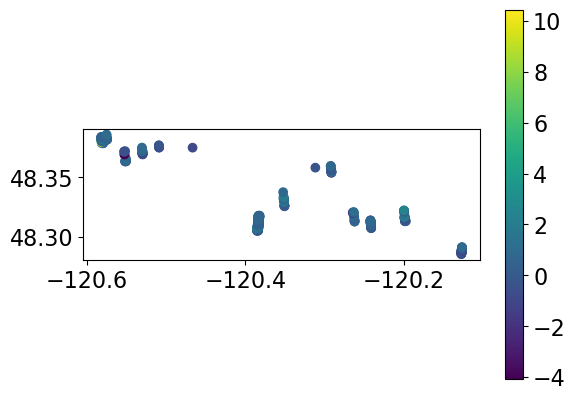

In [43]:
dep_gdf.plot(column='compare_3dep', legend=True)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  6.,  5., 10., 20., 23.,
        31., 51., 56., 48., 29., 13., 23.,  8.,  4.,  3.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-4.08667885, -3.79599542, -3.50531199, -3.21462856, -2.92394513,
        -2.63326169, -2.34257826, -2.05189483, -1.7612114 , -1.47052797,
        -1.17984454, -0.88916111, -0.59847768, -0.30779425, -0.01711082,
         0.27357262,  0.56425605,  0.85493948,  1.14562291,  1.43630634,
         1.72698977,  2.0176732 ,  2.30835663,  2.59904006,  2.8897235 ,
         3.18040693,  3.47109036,  3.76177379,  4.05245722,  4.34314065,
         4.63382408,  4.92450751,  5.21519094,  5.50587437,  5.79655781,
         6.08724124,  6.37792467,  6.6686081 ,  6.95929153,  7.24997496,
         7.54065839,  7.83134182,  8.12202525,  8.41270869,  8.70339212,
         8.99407555,  9.28475898,  9.57544241,  9.86612584,

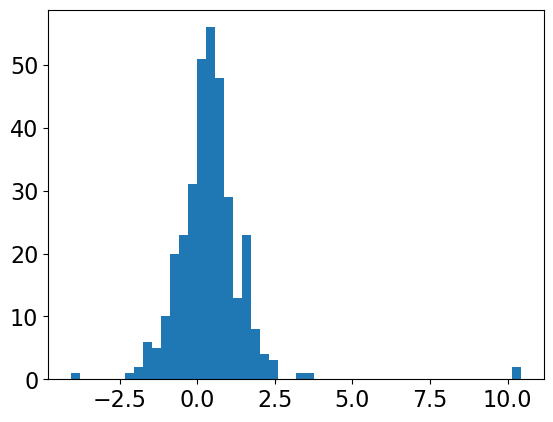

In [44]:
plt.hist(dep_gdf['compare_3dep'], bins=50)

In [45]:
dep_gdf['compare_3dep'].describe()

count    338.000000
mean       0.410400
std        1.180365
min       -4.086679
25%       -0.122573
50%        0.398102
75%        0.851316
max       10.447493
Name: compare_3dep, dtype: float64

Text(0.5, 1.0, 'Difference between: ATL06SR - 3dep \nand ATL06SR - DNR')

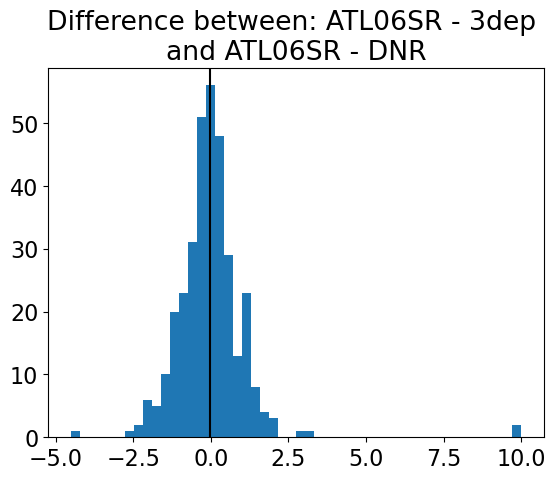

In [64]:
fig, ax = plt.subplots()
plt.hist((dep_gdf['difference_bicubic'] - dep_gdf['difference_3dep']), bins=50)
plt.axvline(x=np.nanmedian(dep_gdf['difference_bicubic'] - dep_gdf['difference_3dep']), color='k')
plt.title('Difference between: ATL06SR - 3dep \nand ATL06SR - DNR')

In [28]:
# This function was written by Friedrich Knuth, UW and is contained in core.py
# The sampling technique can be specified, here we use bicubic

bicubic_interp = core.interpolate(lidar_fn, coord, offset=3, kind='cubic')

In [20]:
bicubic_interp

array([2501.69532602, 2501.24915136, 2501.22492284, ...,           nan,
                 nan,           nan])

In [29]:
atl06sr_gdf['bicubic_lidar_z'] = bicubic_interp

### Comparison of the Sampling Methods:

In [30]:
atl06sr_gdf['sampling_dif'] = atl06sr_gdf['lidar_z'] - atl06sr_gdf['bicubic_lidar_z']

In [31]:
atl06sr_gdf['sampling_dif'].describe()

/Users/Hannah/opt/miniconda3/envs/analysis_2022/lib/python3.8/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count    146613.000000
mean          0.000126
std           0.102215
min          -1.242832
25%          -0.048034
50%           0.000040
75%           0.048072
max           2.545810
Name: sampling_dif, dtype: float64

In [33]:
atl06sr_gdf['difference_bicubic'] = atl06sr_gdf['h_mean'] - atl06sr_gdf['bicubic_lidar_z']

In [34]:
atl06sr_gdf['difference_bicubic'].describe()

/Users/Hannah/opt/miniconda3/envs/analysis_2022/lib/python3.8/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count    146613.000000
mean         -0.517175
std           1.200843
min         -21.067148
25%          -1.018944
50%          -0.375648
75%           0.095410
max          15.097490
Name: difference_bicubic, dtype: float64

## Remove Offset Between Datasets  
* ICESat-2 is measuring the ground surface as slightly below the surface of the DEM.
* **Question:** What resolution for the snow off data? Highest resolution looks better, but is it acceptible to use different resolution data?

## Filter Outliers  
Using David's code  
Less concerned about doing this since I use the Median in my anayses

In [23]:
atl06sr_gdf = pickle.load(open('../../data/atl06/methow_all_sr-atl06-10172022_processed_bicubic.pkl', 'rb'))

In [24]:
atl06sr_gdf['zscore'] = (atl06sr_gdf['difference_bicubic'] - atl06sr_gdf['difference_bicubic'].mean()) / atl06sr_gdf['difference_bicubic'].std()

zscore_thresh = 3
absdiff_thresh = 5.0

In [25]:
# trying to get different zscore values for snow on versus snow off values

atl06_idx = (atl06sr_gdf['zscore'].abs() <= zscore_thresh)

inner_snowoff_idx = (atl06sr_gdf['zscore'].abs() <= zscore_thresh) & \
    (atl06sr_gdf['difference_bicubic'].abs() <=absdiff_thresh) & \
    (atl06sr_gdf['snow_presence'] == 0)

inner_snowon_idx = (atl06sr_gdf['zscore'].abs() <= zscore_thresh) & \
    (atl06sr_gdf['difference_bicubic'].abs() <=absdiff_thresh) & \
    (atl06sr_gdf['snow_presence'] == 1)

In [ ]:
atl06sr_gdf['difference_bicubic'].describe()

In [28]:
atl06sr_gdf['difference_bicubic'].describe()

count    146533.000000
mean         -0.517483
std           1.198546
min         -17.800872
25%          -1.019377
50%          -0.375760
75%           0.095302
max          15.097490
Name: difference_bicubic, dtype: float64

In [27]:
atl06sr_gdf[atl06_idx]['difference_bicubic'].describe()

count    144328.000000
mean         -0.483697
std           1.038808
min          -4.112953
25%          -0.990424
50%          -0.370530
75%           0.094810
max           3.074834
Name: difference_bicubic, dtype: float64

In [68]:
atl06sr_gdf[atl06sr_gdf['snow_presence'] == 0]['difference'].describe()

count    79932.000000
mean        -0.591621
std          1.193962
min        -21.648634
25%         -1.074308
50%         -0.439782
75%         -0.041374
max         15.269414
Name: difference, dtype: float64

In [35]:
atl06sr_gdf[atl06sr_gdf['snow_presence'] == 0]['difference_bicubic'].describe()

count    79916.000000
mean        -0.591337
std          1.190067
min        -21.067148
25%         -1.070773
50%         -0.440047
75%         -0.045103
max         15.097490
Name: difference_bicubic, dtype: float64

In [69]:
atl06sr_gdf[atl06sr_gdf['snow_presence'] == 0]['difference_20m'].describe()

count    79933.000000
mean        -0.623840
std          2.270651
min        -32.482130
25%         -1.617036
50%         -0.435471
75%          0.442228
max         26.855712
Name: difference_20m, dtype: float64

In [70]:
atl06sr_gdf['diff_plus'] = atl06sr_gdf['difference'] - atl06sr_gdf[atl06sr_gdf['snow_presence'] == 0]['difference'].median()
atl06sr_gdf[atl06sr_gdf['snow_presence'] == 0]['diff_plus'].describe()

count    79932.000000
mean        -0.151839
std          1.193962
min        -21.208852
25%         -0.634525
50%          0.000000
75%          0.398409
max         15.709196
Name: diff_plus, dtype: float64

In [15]:
atl06sr_gdf.loc[inner_snowoff_idx,'difference_bicubic'].median()

-0.436195635256297

In [16]:
atl06sr_gdf['difference_bicubic'].median()

-0.37575965582095705

In [14]:
atl06sr_gdf = atl06sr_gdf.assign(diff_plus_bicubic = atl06sr_gdf['difference_bicubic'] - atl06sr_gdf.loc[inner_snowoff_idx,'difference_bicubic'].median()) 
atl06sr_gdf[inner_snowoff_idx]['diff_plus_bicubic'].describe()

count    78596.000000
mean        -0.128181
std          1.018062
min         -3.676757
25%         -0.607190
50%          0.000000
75%          0.388306
max          3.511030
Name: diff_plus_bicubic, dtype: float64

In [26]:
atl06sr_gdf.loc[inner_snowoff_idx,'difference_bicubic'].median()

-0.436195635256297

### Do the same thing, but for the data differenced from the 20m DTM

In [71]:
atl06sr_gdf['diff_plus_20m'] = atl06sr_gdf['difference_20m'] - atl06sr_gdf[atl06sr_gdf['snow_presence'] == 0]['difference_20m'].median()
atl06sr_gdf[atl06sr_gdf['snow_presence'] == 0]['diff_plus_20m'].describe()

count    79933.000000
mean        -0.188369
std          2.270651
min        -32.046659
25%         -1.181565
50%          0.000000
75%          0.877699
max         27.291183
Name: diff_plus_20m, dtype: float64

In [72]:
atl06sr_gdf['diff_plus'].describe()

/Users/Hannah/opt/miniconda3/envs/analysis_2022/lib/python3.8/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count    146647.000000
mean         -0.077491
std           1.205088
min         -21.208852
25%          -0.580094
50%           0.064720
75%           0.536906
max          15.709196
Name: diff_plus, dtype: float64

In [73]:
atl06sr_gdf['diff_plus_20m'].describe()

/Users/Hannah/opt/miniconda3/envs/analysis_2022/lib/python3.8/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count    146662.000000
mean         -0.109742
std           2.364963
min         -32.046659
25%          -1.191098
50%           0.066426
75%           1.061379
max          27.291183
Name: diff_plus_20m, dtype: float64

### And again, for the low slope values

In [13]:
atl06sr_gdf = pickle.load(open('../../data/atl06/methow_all_sr-atl06-10172022_processed.pkl', 'rb'))

In [15]:
atl06sr_gdf['diff_plus_lowslope'] = atl06sr_gdf['difference'] - atl06sr_gdf[(atl06sr_gdf['snow_presence'] == 0) & (atl06sr_gdf['slope_20m'] < 10)]['difference'].median()
atl06sr_gdf[(atl06sr_gdf['snow_presence'] == 0) & (atl06sr_gdf['slope_20m'] < 10)]['diff_plus_lowslope'].describe()

count    79932.000000
mean        -0.239075
std          1.193962
min        -21.296088
25%         -0.721762
50%         -0.087236
75%          0.311172
max         15.621959
Name: diff_plus_lowslope, dtype: float64

In [17]:
atl06sr_gdf[(atl06sr_gdf['snow_presence'] == 0) & (atl06sr_gdf['slope_20m'] < 10)]['diff_plus_lowslope'].describe()

count    27189.000000
mean        -0.012904
std          0.544310
min         -8.496083
25%         -0.204390
50%          0.000000
75%          0.198143
max          6.882008
Name: diff_plus_lowslope, dtype: float64

In [18]:
atl06sr_gdf['diff_plus_lowslope'].describe()

/Users/Hannah/opt/miniconda3/envs/analysis_2022/lib/python3.8/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count    146647.000000
mean         -0.164727
std           1.205088
min         -21.296088
25%          -0.667330
50%          -0.022517
75%           0.449669
max          15.621959
Name: diff_plus_lowslope, dtype: float64

In [16]:
atl06sr_gdf[(atl06sr_gdf['snow_presence'] == 0) & (atl06sr_gdf['slope_20m'] < 10)]['difference'].describe()

count    27189.000000
mean        -0.365450
std          0.544310
min         -8.848629
25%         -0.556935
50%         -0.352546
75%         -0.154402
max          6.529462
Name: difference, dtype: float64

Text(0.5, 1.0, '20m')

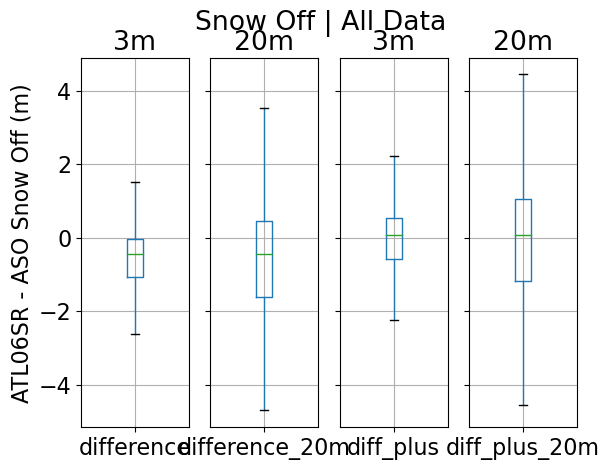

In [74]:
fig, ax = plt.subplots(1,4, sharey=True)
atl06sr_gdf[atl06sr_gdf['snow_presence'] == 0].boxplot(column=['difference'], showfliers=False, ax=ax[0])
atl06sr_gdf[atl06sr_gdf['snow_presence'] == 0].boxplot(column=['difference_20m'], showfliers=False, ax=ax[1])
atl06sr_gdf.boxplot(column=['diff_plus'], showfliers=False, ax=ax[2])
atl06sr_gdf.boxplot(column=['diff_plus_20m'], showfliers=False, ax=ax[3])
ax[0].set_ylabel('ATL06SR - ASO Snow Off (m)')
fig.suptitle('Snow Off | All Data')
ax[0].set_title('3m')
ax[1].set_title('20m')
ax[2].set_title('3m')
ax[3].set_title('20m')

Text(0.5, 0, 'dif_plus')

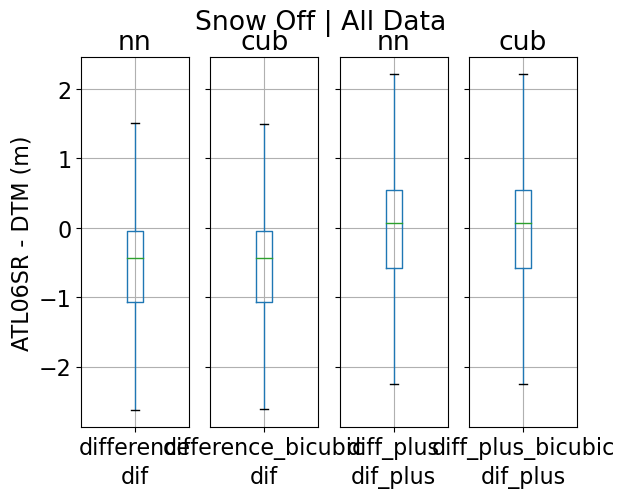

In [38]:
fig, ax = plt.subplots(1,4, sharey=True)
atl06sr_gdf[atl06sr_gdf['snow_presence'] == 0].boxplot(column=['difference'], showfliers=False, ax=ax[0])
atl06sr_gdf[atl06sr_gdf['snow_presence'] == 0].boxplot(column=['difference_bicubic'], showfliers=False, ax=ax[1])
atl06sr_gdf.boxplot(column=['diff_plus'], showfliers=False, ax=ax[2])
atl06sr_gdf.boxplot(column=['diff_plus_bicubic'], showfliers=False, ax=ax[3])
ax[0].set_ylabel('ATL06SR - DTM (m)')
fig.suptitle('Snow Off | All Data')
ax[0].set_title('nn')
ax[0].set_xlabel('dif')
ax[1].set_title('cub')
ax[1].set_xlabel('dif')
ax[2].set_title('nn')
ax[2].set_xlabel('dif_plus')
ax[3].set_title('cub')
ax[3].set_xlabel('dif_plus')

## Remove Dates with N < 30

In [40]:
atl06sr_gdf = pickle.load(open('../../data/atl06/methow_all_sr-atl06-10172022_processed_bicubic.pkl', 'rb'))

In [41]:
atl06sr_gdf['n'] = atl06sr_gdf.groupby('acqdate')['acqdate'].transform('count')

In [43]:
atl06sr_gdf.head()

,pflags,h_mean,dh_fit_dy,spot,w_surface_window_final,h_sigma,distance,segment_id,dh_fit_dx,rgt,cycle,delta_time,gt,n_fit_photons,rms_misfit,geometry,acqdate,doy,decyear,dowy,snow_presence,lidar_z,difference,lidar_z_20m,difference_20m,slope_3m,slope_20m,slope_100m,diff_plus,diff_plus_20m,zscore,n,diff_plus_lowslope,bicubic_lidar_z,sampling_dif,difference_bicubic,diff_plus_bicubic
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-11-09 22:09:43.662511060,0,774.110259,0.0,5,9.386548,0.079705,5.382001e+06,268398,0.367318,646,1,2.703658e+07,20,41,0.506044,POINT (722265.057 5358346.501),2018-11-09,313,2018.857324,40,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1496,NaN,NaN,NaN,NaN,NaN
2018-11-09 22:09:43.789049908,0,919.941824,0.0,5,3.000000,0.050617,5.382903e+06,268443,0.028568,646,1,2.703658e+07,20,42,0.305572,POINT (722145.580 5359238.959),2018-11-09,313,2018.857324,40,0,921.263184,-1.321359,924.401428,-4.459604,21.903059,11.596403,NaN,-0.881577,-4.024133,-0.667243,1496,-0.968813,921.309377,-0.046193,-1.367552,-0.927506
2018-11-09 22:09:43.794872008,0,918.460968,0.0,5,3.029108,0.046853,5.382943e+06,268445,-0.116342,646,1,2.703658e+07,20,31,0.240537,POINT (722140.182 5359280.079),2018-11-09,313,2018.857324,40,0,920.253967,-1.792999,916.323120,2.137848,20.189816,19.377096,17.052359,-1.353217,2.573319,-1.058617,1496,-1.440454,920.302309,-0.048342,-1.841341,-1.401294
2018-11-09 22:09:43.797684372,0,916.399163,0.0,5,3.000000,0.059160,5.382963e+06,268446,-0.091024,646,1,2.703658e+07,20,39,0.325805,POINT (722137.582 5359299.951),2018-11-09,313,2018.857324,40,0,916.869568,-0.470405,916.078796,0.320367,10.068434,15.654634,17.052359,-0.030623,0.755838,0.038892,1496,-0.117859,916.932254,-0.062686,-0.533091,-0.093044
2018-11-09 22:09:43.800494952,0,915.721672,0.0,5,3.000000,0.038990,5.382983e+06,268447,-0.027886,646,1,2.703658e+07,20,40,0.245902,POINT (722134.962 5359319.820),2018-11-09,313,2018.857324,40,0,917.229431,-1.507760,916.709717,-0.988045,7.963524,12.223098,17.052359,-1.067977,-0.552574,-0.821921,1496,-1.155214,917.339460,-0.110029,-1.617788,-1.177742


In [44]:
atl06sr_gdf = atl06sr_gdf[atl06sr_gdf['n'] > 30]

### Bicubic Interpolation of 20m Slope

In [ ]:
slope_fn_20m = '../../data/lidar/methow/dtm/methow_basin_2018_dtm_combined_32610_20m_slope.tif'
src_slo_20m = rio.open(slope_fn_20m)

In [20]:
coord = [(pt.x, pt.y) for pt in atl06sr_gdf.to_crs(src_slo_20m.crs).geometry]

In [21]:
# This function was written by Friedrich Knuth, UW and is contained in core.py
# The sampling technique can be specified, here we use bicubic

bicubic_interp = core.interpolate(slope_fn_20m, coord, offset=3, kind='cubic')

In [22]:
bicubic_interp

array([        nan, 16.22180619, 14.96193022, ...,  8.17363462,
        5.49520709, 15.47154646])

In [23]:
atl06sr_gdf['median_slope20d'] = bicubic_interp

# Save a file with all the sampled data  

In [26]:
atl06sr_out_fn = '../../data/atl06/methow_all_sr-atl06-10172022_processed_bicubic.pkl'

with open(atl06sr_out_fn, 'wb') as f:
    pickle.dump(atl06sr_gdf, f)

### This is as far as I've gotten with the bicubic resampling

## Filter Outliers  
Using David's code  
Less concerned about doing this since I use the Median in my anayses

In [75]:
atl06sr_gdf['zscore'] = (atl06sr_gdf['diff_plus'] - atl06sr_gdf['diff_plus'].mean()) / atl06sr_gdf['diff_plus'].std()

zscore_thresh = 3
absdiff_thresh = 5.0

In [76]:
atl06_idx = (atl06sr_gdf['zscore'].abs() <= zscore_thresh) & (atl06sr_gdf['diff_plus'].abs() <= absdiff_thresh)

inner_snowoff_idx = (atl06sr_gdf['zscore'].abs() <= zscore_thresh) & \
    (atl06sr_gdf['diff_plus'].abs() <= absdiff_thresh) & \
    (atl06sr_gdf['snow_presence'] == 0)

inner_snowon_idx = (atl06sr_gdf['zscore'].abs() <= zscore_thresh) & \
    (atl06sr_gdf['diff_plus'].abs() <= absdiff_thresh) & \
    (atl06sr_gdf['snow_presence'] == 1)

In [77]:
atl06sr_gdf[atl06_idx]['diff_plus'].describe()

count    144467.000000
mean         -0.044017
std           1.044224
min          -3.692366
25%          -0.551577
50%           0.070023
75%           0.536296
max           3.534498
Name: diff_plus, dtype: float64

In [78]:
atl06sr_gdf[inner_snowoff_idx]['diff_plus'].describe()

count    78710.000000
mean        -0.124156
std          1.023742
min         -3.692366
25%         -0.604602
50%          0.004464
75%          0.396107
max          3.534498
Name: diff_plus, dtype: float64

In [79]:
atl06sr_gdf[inner_snowon_idx]['diff_plus'].describe()

count    65757.000000
mean         0.051908
std          1.060298
min         -3.691610
25%         -0.482775
50%          0.185642
75%          0.678546
max          3.533152
Name: diff_plus, dtype: float64

In [146]:
atl06sr_gdf['n'] = np.nan
for date in atl06sr_gdf['acqdate'].unique():
    atl06sr_gdf.loc[atl06sr_gdf['acqdate']==date, 'n'] = atl06sr_gdf.loc[atl06sr_gdf['acqdate']==date, 'diff_plus'].count()

In [147]:
atl06sr_gdf.head(2)

,pflags,h_mean,dh_fit_dy,spot,w_surface_window_final,h_sigma,distance,segment_id,dh_fit_dx,rgt,cycle,delta_time,gt,n_fit_photons,rms_misfit,geometry,acqdate,doy,decyear,dowy,snow_presence,lidar_z,difference,lidar_z_20m,difference_20m,slope_3m,slope_20m,slope_100m,diff_plus,diff_plus_20m,zscore,n
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-11-09 22:09:43.662511060,0,774.110259,0.0,5,9.386548,0.079705,5.382001e+06,268398,0.367318,646,1,2.703658e+07,20,41,0.506044,POINT (722265.057 5358346.501),2018-11-09,313,2018.857324,40,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1468.0
2018-11-09 22:09:43.789049908,0,919.941824,0.0,5,3.000000,0.050617,5.382903e+06,268443,0.028568,646,1,2.703658e+07,20,42,0.305572,POINT (722145.580 5359238.959),2018-11-09,313,2018.857324,40,0,921.263184,-1.321359,924.401428,-4.459604,21.903059,11.596403,NaN,-0.881577,-4.024133,-0.667243,1468.0


# Repeat again, sampling slope at different resolutions  
Slope DEMs were produced via downscaling where necessary and then using gdaldem to output a slope file:  
"gdaldem slope $lidar_fn  $lidar_slope_fn -co COMPRESS=LZW -co TILED=YES"

In [18]:
slope_fn_3m = '../../data/lidar/methow/dtm/methow_basin_2018_dtm_combined_32610_3m_slope.tif'

slope_fn_100m = '../../data/lidar/methow/dtm/methow_basin_2018_dtm_combined_32610_100m_slope.tif'

In [19]:
#src_slo_3m = rio.open(slope_fn_3m)

#src_slo_100m = rio.open(slope_fn_100m)


In [25]:
# Sample 3m resolution slope map

sample_raster(atl06sr_gdf, src_slo_3m)

NameError: name 'src_slo_3m' is not defined

In [ ]:
# Sample 20m resolution slope map

sample_raster(atl06sr_gdf, src_slo_20m)

In [ ]:
# Sample 100m resolution slope map

sample_raster(atl06sr_gdf, src_slo_100m)